# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alexandermcmullan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [4]:
# Create a newsapi client
from newsapi import NewsApiClient

newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q='bitcoin',
    language="en",
    sort_by="relevancy",
)

In [8]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)

In [11]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []

for articles in bitcoin_news["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
bitcoin  = pd.DataFrame(sentiments)
bitcoin.head()

,text,Compound,Positive,Negative,Neutral
0,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939
1,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920
2,Retailers are increasingly accepting cryptocur...,0.6187,0.153,0.000,0.847
3,"By Joe TidyCyber reporter \r\n""Follow the mone...",-0.8860,0.000,0.271,0.729
4,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873


In [12]:
# Create the Ethereum sentiment scores DataFrame
sentiments = []

for articles in ethereum_news["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
ethereum  = pd.DataFrame(sentiments)
ethereum.head()

,text,Compound,Positive,Negative,Neutral
0,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939
1,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810
2,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.000,0.861
3,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.000,1.000
4,"HONG KONG, Aug 5 (Reuters) - Ether held near t...",0.0000,0.000,0.000,1.000


In [14]:
# Describe the Bitcoin Sentiment
bitcoin.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.00000,20.000000
mean,0.084165,0.053650,0.03610,0.910250
std,0.441501,0.060035,0.06937,0.074356
min,-0.886000,0.000000,0.00000,0.729000
25%,-0.074000,0.000000,0.00000,0.860500
50%,0.000000,0.026000,0.00000,0.908000
75%,0.471750,0.096250,0.06450,1.000000
max,0.680800,0.157000,0.27100,1.000000


In [15]:
# Describe the Ethereum Sentiment
ethereum.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.075400,0.040700,0.015300,0.94395
std,0.306664,0.061063,0.031872,0.06275
min,-0.440400,0.000000,0.000000,0.81000
25%,0.000000,0.000000,0.000000,0.91450
50%,0.000000,0.000000,0.000000,0.94800
75%,0.243725,0.059000,0.000000,1.00000
max,0.695600,0.190000,0.094000,1.00000


# Questions:

# Q: Which coin had the highest mean positive score?

# A: Bitcoin had the highest mean score of 0.53650, because i'm comparing the highest mean postive score of bitcoin to ethereum.

# Q: Which coin had the highest compound score?

# A: Bitcoin has the highest compund score of 0.84165, beacuse i'm comparing the highest mean score of bitcoin to ethereum.

# Q. Which coin had the highest positive score?

# A: Ethereum had the highest postive score of 0.190000, beacuse i'm comparing the postive max score of ethereum to bitcoin.

# Keep in mind my data will be different to the grading answer sheet as, i pulled the data from a more recent updated day 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [17]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [18]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer() 

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [19]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    words = word_tokenize(text)
   
    # Create a tokenized list of the words
    words = list(filter(lambda w: w.lower(), words))
    
    # Lemmatize words into root words
    words = list(filter(lambda t: t not in punctuation, words))
   
    # Convert the words to lowercase
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Remove the stop words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens

In [20]:
# Create a new tokens column for Bitcoin
bitcoin["tokens"] = btc.text.apply(tokenizer)
bitcoin.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939,"[wife, started, little, garden, urban, backyar..."
1,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920,"[Photo, Joe, Raedle/Getty, Images, Twitter, Sq..."
2,Retailers are increasingly accepting cryptocur...,0.6187,0.153,0.000,0.847,"[Retailers, increasingly, accepting, cryptocur..."
3,"By Joe TidyCyber reporter \r\n""Follow the mone...",-0.8860,0.000,0.271,0.729,"[Joe, TidyCyber, reporter, Follow, money, gene..."
4,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873,"[get, roundup, TechCrunchs, biggest, important..."


In [21]:
# Create a new tokens column for Ethereum
ethereum["tokens"] = eth.text.apply(tokenizer)
ethereum.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939,"[Blockchain, infrastructure, startup, heating,..."
1,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810,"[Cent, founded, 2017, ad-free, creator, networ..."
2,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.000,0.861,"[bell, today, Coinbase, reported, another, per..."
3,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.000,1.000,"[Representation, Ethereum, virtual, currency, ..."
4,"HONG KONG, Aug 5 (Reuters) - Ether held near t...",0.0000,0.000,0.000,1.000,"[HONG, KONG, Aug, 5, Reuters, Ether, held, nea..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [28]:
from collections import Counter
from nltk import ngrams

In [29]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(bitcoin.text.str.cat()), N)
Counter(grams).most_common(20)

[(('illustration', 'taken'), 6),
 (('Reuters', 'Bitcoin'), 4),
 (('2021', 'REUTERS/Dado'), 3),
 (('virtual', 'currency'), 3),
 (('currency', 'bitcoin'), 3),
 (('bitcoin', 'seen'), 3),
 (('seen', 'front'), 3),
 (('REUTERS/Dado', 'Ruvic/Illustration'), 3),
 (('char', 'T-Mobile'), 2),
 (('char', 'representation'), 2),
 (('cryptocurrency', 'Bitcoin'), 2),
 (('Bitcoin', 'seen'), 2),
 (('data', 'breach'), 2),
 (('char', 'Representations'), 2),
 (('representation', 'virtual'), 2),
 (('front', 'stock'), 2),
 (('stock', 'graph'), 2),
 (('graph', 'illustration'), 2),
 (('taken', 'November'), 2),
 (('November', '19'), 2)]

In [30]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(ethereum.text.str.cat()), N)
Counter(grams).most_common(20)

[(('PC', 'motherboard'), 4),
 (('Vitalik', 'Buterin'), 4),
 (('char', 'Representations'), 3),
 (('Ethereum', 'placed'), 3),
 (('placed', 'PC'), 3),
 (('motherboard', 'illustration'), 3),
 (('illustration', 'taken'), 3),
 (('taken', 'June'), 3),
 (('June', '29'), 3),
 (('29', '2021'), 3),
 (('2021', 'REUTERS/Dado'), 3),
 (('ether', 'burned'), 3),
 (('REUTERS/Dado', 'Ruvic/IllustrationNEW'), 2),
 (('Ruvic/IllustrationNEW', 'YORK'), 2),
 (('Aug', '5'), 2),
 (('5', 'Reuters'), 2),
 (('Representations', 'cryptocurrencies'), 2),
 (('cryptocurrencies', 'Bitcoin'), 2),
 (('Bitcoin', 'Ethereum'), 2),
 (('REUTERS/Dado', 'Ruvic/IllustrationAug'), 2)]

In [31]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [32]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens = tokenizer(bitcoin.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('Bitcoin', 8),
 ('Reuters', 8),
 ('2021', 6),
 ('seen', 6),
 ('illustration', 6),
 ('taken', 6),
 ('REUTERS/Dado', 6),
 ('cryptocurrency', 5),
 ('July', 4)]

In [33]:
# Use token_count to get the top 10 words for Ethereum
all_tokens = tokenizer(ethereum.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('Ethereum', 12),
 ('Reuters', 5),
 ('network', 4),
 ('PC', 4),
 ('motherboard', 4),
 ('illustration', 4),
 ('REUTERS/Dado', 4),
 ('ethereum', 4),
 ('Bitcoin', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [41]:
!pip install wordcloud

     |████████████████████████████████| 220 kB 3.0 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp37-cp37m-macosx_10_9_x86_64.whl size=158997 sha256=9900285b9040cf6f3a154a36929ccc9f70646615661f54d1224ef2d37c41a616
  Stored in directory: /Users/alexandermcmullan/Library/Caches/pip/wheels/f8/f6/55/6bd394c32a844a621ca0fe5dbf563c8d71d71edaf095656991
Successfully built wordcloud


In [43]:

def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

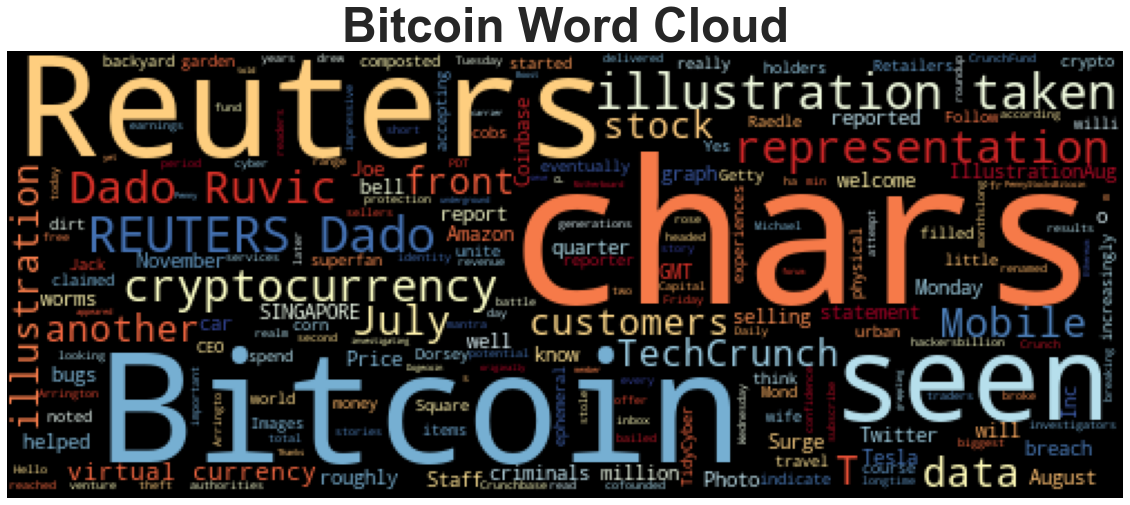

In [44]:
# Generate the Bitcoin word cloud
wordcloud(bitcoin.text.str.cat(), title="Bitcoin Word Cloud")

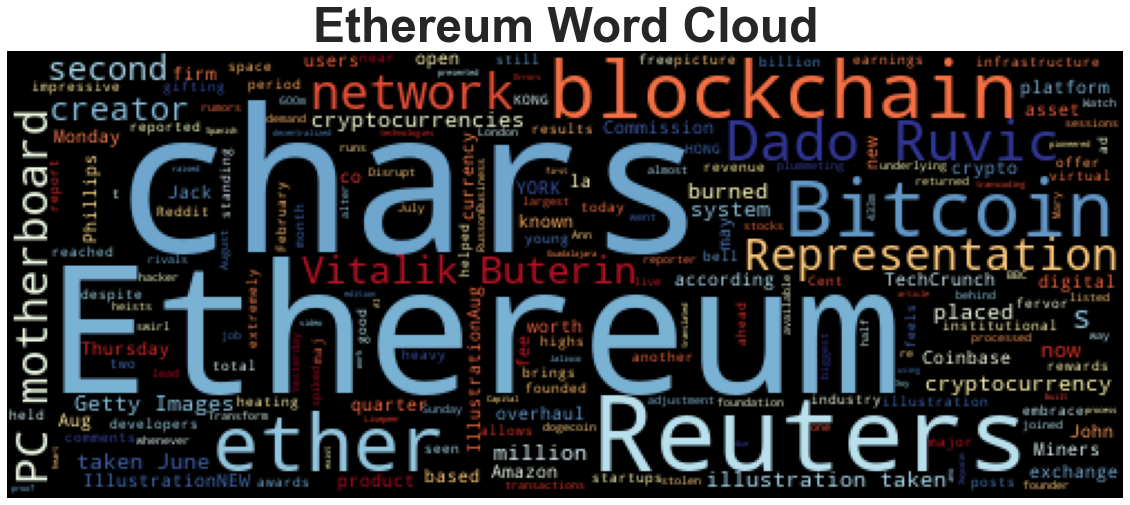

In [45]:
# Generate the Ethereum word cloud
wordcloud(ethereum.text.str.cat(), title="Ethereum Word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [49]:
import spacy
from spacy import displacy

In [50]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.6 MB 3.1 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [51]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [52]:
# Concatenate all of the Bitcoin text together
btc_txt_together = bitcoin.text.str.cat()
btc_txt_together

'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]Photo by Joe Raedle/Getty Images\r\n\n \n\n Twitter and Square CEO Jack Dorsey, a noted superfan of Bitcoin, claimed on Monday that the cryptocurrency will eventually unite the world. Yes, really.\nOn Mond… [+2119 chars]Retailers are increasingly accepting cryptocurrency for physical items, but did you know\xa0you can spend crypto on ephemeral experiences like travel too? As more cryptocurrency holders indicate a willi… [+2783 chars]By Joe TidyCyber reporter \r\n"Follow the money" - for generations it\'s been the mantra of investigators looking for criminals.\r\nIn the cyber-realm, this battle between criminals and the authorities ha… [+3786 chars]To get a roundup of TechCrunchs biggest and most important stories delivered to your inbox every day at 3 p.m. PDT, subscribe her

In [53]:
# Run the NER processor on all of the text
text = nlp(btc_txt_together)
# Add a title to the document
text.user_data["title"] = "bitcoin NER processed"

In [54]:
# Render the visualization
displacy.render(text, style='ent', jupyter=True)

In [55]:
# List all Entities
for ent in text.ents:
    print(ent.text, ent.label_)

Joe Raedle/ PERSON
Twitter PRODUCT
Square PRODUCT
Jack Dorsey PERSON
Monday DATE
Joe PERSON
every day DATE
3 p.m. PDT TIME
Daily Crunch ORG
July 23, 2021 DATE
chars]T-Mobile ORG
two years DATE
roughly 49 million CARDINAL
Michael Arrington PERSON
TechCrunch LOC
Crunchbase ORG
CrunchFund PRODUCT
Tuesday DATE
2017 DATE
today DATE
Coinbase PERSON
its second quarter DATE
the quarter DATE
Coinbase ORG
$2.23 billion MONEY
August 6, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug PERSON
20 CARDINAL
Reuters ORG
5.01 % PERCENT
49,106.4 MONEY
22:04 GMT TIME
Friday DATE
July 28 DATE
Reuters ORG
40,000 MONEY
Wednesday DATE
20, 2021 DATE
PennyStocksBitcoin Price Surge Helped Boost ORG
Bitcoin, Dogecoin ORG
Ethereum GPE
chars]T-Mobile ORG
Motherboard PERSON
T-Mobile ORG
Roughly 47.8 million CARDINAL
June 7, 2021 DATE
REUTERS ORG
Edgar Su/IllustrationAug PERSON
Reuters ORG
7.07% PERCENT
47,587.38 MONEY
2200 CARDINAL
Martin/CNET
A ORG
UK GPE
Spain GPE
Twitter PRODUCT
2020 DATE
the US Department of Jus

---

### Ethereum NER

In [57]:
# Concatenate all of the Ethereum text together
eth_txt_together = eth.text.str.cat()
eth_txt_together

"Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars]Cent was founded in 2017 as an ad-free creator network that allows users to offer each other crypto rewards for good posts and comments — it’s like gifting awards on Reddit, but with Ethereum. But in… [+6228 chars]After the bell today, Coinbase reported another period of impressive results in its second quarter earnings report.\r\nDuring the quarter, Coinbase’s total revenue reached $2.23 billion, which helped t… [+4900 chars]Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/IllustrationNEW YORK, Aug 5 (Reuters) - A maj… [+439 chars]HONG KONG, Aug 5 (Reuters) - Ether held near two-month highs on Thursday ahead of a major adjustment to its underlying ethereum blockchain tha

In [59]:
# Run the NER processor on all of the text
eth_text = nlp(eth_txt_together)

# Add a title to the document
eth_text.user_data["title"] = "ethereum NER processed"

In [60]:
# Render the visualization
displacy.render(eth_text, style='ent', jupyter=True)

In [61]:
# List all Entities
for ent in eth_text.ents:
    print(ent.text, ent.label_)

2017 DATE
Reddit NORP
Ethereum PERSON
today DATE
Coinbase PERSON
its second quarter DATE
the quarter DATE
Coinbase ORG
$2.23 billion MONEY
Ethereum PERSON
February 3, 2018 DATE
REUTERS ORG
Dado Ruvic PERSON
Aug 5 DATE
Reuters ORG
Aug 5 DATE
Reuters ORG
two-month DATE
Thursday DATE
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug 3 PERSON
Reuters ORG
Ethereum PERSON
Monday DATE
Amazon ORG
Amazon ORG
chars]Vitalik Buterin PERSON
TechCrunch Disrupt London 2015 ORG
John Phillips PERSON
Vitalik Buterin PERSON
Mary-Ann RussonBusiness PERSON
BBC News ORG
almost half CARDINAL
$600m MONEY
433 MONEY
Yesterday DATE
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
July 30 DATE
Reuters ORG
second ORDINAL
August 5 DATE
Sunday DATE
over 45,799 CARDINAL
second ORDINAL
Dado Ruvic PERSON
Reuters ORG
More than $144 million MONEY
Livepeer PERSON
$20 million MONEY
Ethereum PERSON
Spanish NORP
AI ORG
Xoy Capital PERSON
Guadalajara GPE
Jalisco GPE
Xoycoin PERSON
Ether

---